# Dfsu and Mesh - Plotting
Demonstrate different ways of plotting dfsu and mesh files. This includes plotting

* outline_only
* mesh_only
* patch - similar to MIKE Zero box contour)
* contour - contour lines
* contourf - filled contours
* shaded

In [1]:
import mikeio
import matplotlib.pyplot as plt

# Load dfsu file

In [2]:
filename = '../tests/testdata/FakeLake.dfsu'
dfs = mikeio.open(filename)
dfs

<mikeio.Dfsu2DH>
number of elements: 1011
number of nodes: 798
projection: PROJCS["UTM-17",GEOGCS["Unused",DATUM["UTM Projections",SPHEROID["WGS 1984",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["False_Easting",500000],PARAMETER["False_Northing",0],PARAMETER["Central_Meridian",-81],PARAMETER["Scale_Factor",0.9996],PARAMETER["Latitude_Of_Origin",0],UNIT["Meter",1]]
items:
  0:  Bathymetry <Bathymetry> (meter)
time: time-invariant file (1 step) at 2000-01-01 12:00:00

In [3]:
geom = dfs.geometry
geom

Flexible Mesh Geometry: Dfsu2D
number of nodes: 798
number of elements: 1011
projection: PROJCS["UTM-17",GEOGCS["Unused",DATUM["UTM Projections",SPHEROID["WGS 1984",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["False_Easting",500000],PARAMETER["False_Northing",0],PARAMETER["Central_Meridian",-81],PARAMETER["Scale_Factor",0.9996],PARAMETER["Latitude_Of_Origin",0],UNIT["Meter",1]]

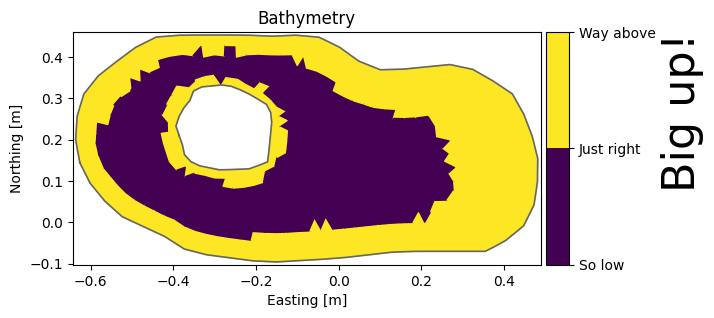

In [31]:
ax, cbar = geom.plot(return_colorbar=True, levels=3);
cbar.set_ticklabels(["So low","Just right", "Way above"])
cbar.set_label("Big up!", fontsize=32, loc="top")

In [ ]:
geom.plot.mesh();

In [ ]:
geom.plot(vmin=-30);

In [ ]:
geom.plot.contour(show_mesh=True, levels=16, cmap='tab20', vmin=-30);

In [ ]:
geom.plot(plot_type='contourf', show_mesh=True, levels=6, vmin=-30);

In [ ]:
geom.plot(plot_type='shaded', show_mesh=False, vmin=-30);

In [ ]:
geom.plot(plot_type='shaded', add_colorbar=False);

In [ ]:
geom.isel(range(400,600)).plot(plot_type='patch', vmin=-30, figsize=(4,6));

In [ ]:
fig, ax = plt.subplots(3,2)

geom.plot(title='patch', ax=ax[0,0])
geom.plot.contourf(title='contourf', levels=5, ax=ax[0,1])
geom.plot(plot_type='shaded', title='shaded', ax=ax[1,0])
geom.plot.contour(title='contour', show_mesh=True, levels=6, vmin=-30, ax=ax[1,1])
geom.plot.mesh(title='mesh_only', ax=ax[2,0])
geom.plot.outline(title='outline_only', ax=ax[2,1])

plt.tight_layout()

# Plot data from surface layer of 3d dfsu file

In [ ]:
filename = "../tests/testdata/oresund_sigma_z.dfsu"
dfs = mikeio.open(filename)
dfs

In [ ]:
da = dfs.read(items="Salinity", layers="top", time=0)[0]
da

In [ ]:
da.plot(cmap='plasma');

In [ ]:
da.plot(add_colorbar=False);

In [ ]:
ax = da.plot.contour(show_mesh=True, cmap='tab20', levels=[11,13,15,17,18,19,20,20.5])
ax.set_ylim(6135000,6160000);

# plot data from a z-layer

In [ ]:
da = dfs.read(items="Salinity", layers=3, time=0)[0]
da

In [ ]:
ax = da.plot(cmap='plasma')
dfs.geometry.plot.outline(ax=ax, title=None);